In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error



In [ ]:

# Directory containing the CSV files
csv_directory = "/content/"

# Get list of CSV files sorted by filename
csv_files = sorted([file for file in os.listdir(csv_directory) if file.endswith(".csv")])


In [ ]:
csv_files

['2021-01.csv',
 '2021-02.csv',
 '2021-03.csv',
 '2021-04.csv',
 '2021-05.csv',
 '2021-06.csv',
 '2021-07.csv',
 '2021-08.csv',
 '2021-09.csv',
 '2021-10.csv',
 '2021-11.csv',
 '2021-12.csv']

In [ ]:
# List to store DataFrames
dfs = []

# Loop through each CSV file in the sorted list
for file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(csv_directory, file))
    dfs.append(df)

# Concatenate the DataFrames along the rows
merged_df = pd.concat(dfs, ignore_index=True)

In [ ]:
# Write the merged DataFrame to a new compressed CSV file
output_file = "/content/2021_all.csv.gz"
merged_df.to_csv(output_file, compression="gzip")

print("Merged CSV file has been created:", output_file)

Merged CSV file has been created: /content/2021_all.csv.gz


In [ ]:
global_df = pd.read_csv("/content/2021_all.csv")
global_df.set_index('date', inplace = True)

<Axes: xlabel='date'>

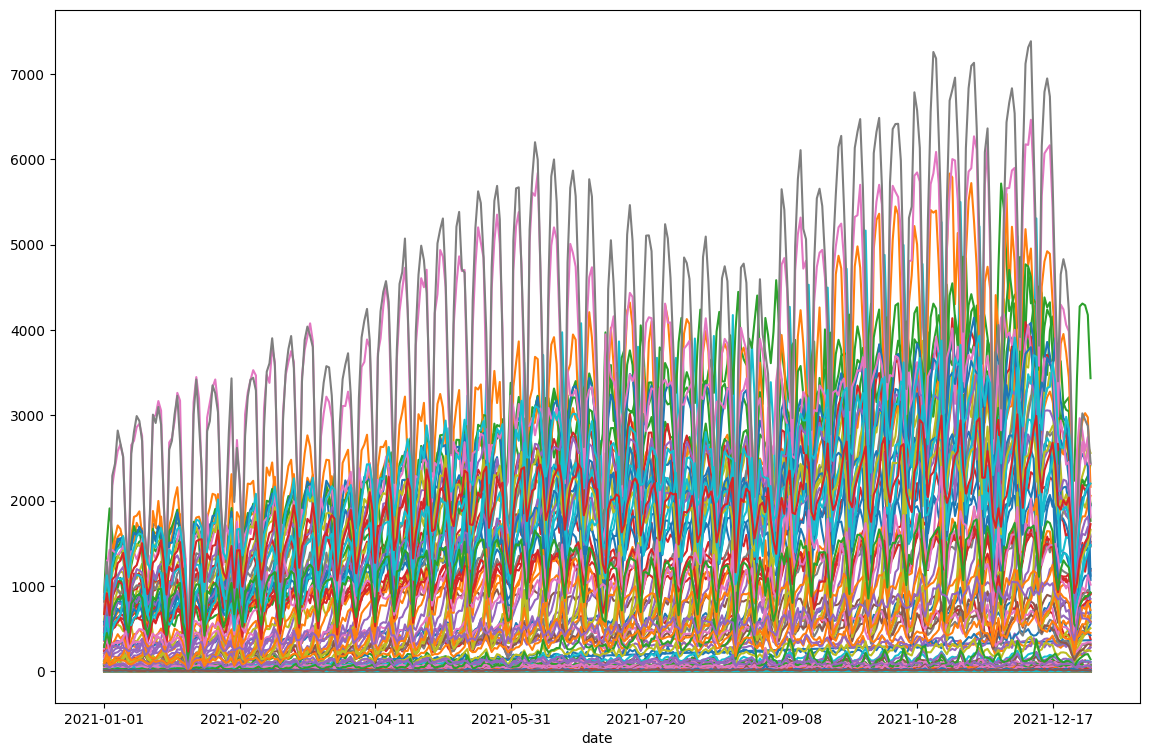

In [ ]:
global_df.plot(figsize=(14, 9), legend=False)

<Axes: xlabel='date'>

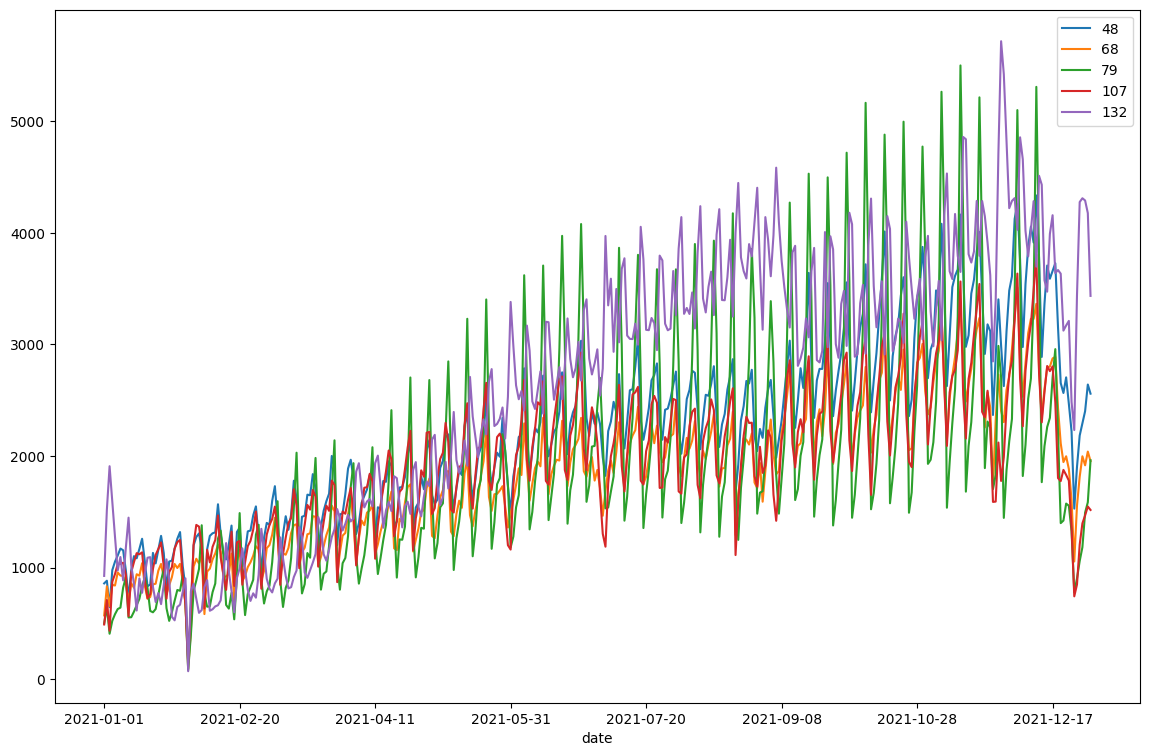

In [ ]:
#plt.plot(global_df[['48','50']])
global_df[['48', '68', '79', '107', '132']].plot(figsize=(14, 9))
#plt.legend()
#plt.show()

# Region 48

In [2]:
plot_df = pd.read_csv("/content/2021_all.csv")

In [3]:
plot_df.set_index('date', inplace = True)
plot_df = pd.DataFrame(plot_df['48'])

In [ ]:

plot_df.head()

,48
date,
2021-01-01,859
2021-01-02,883
2021-01-03,646
2021-01-04,978
2021-01-05,1054


<Axes: xlabel='date'>

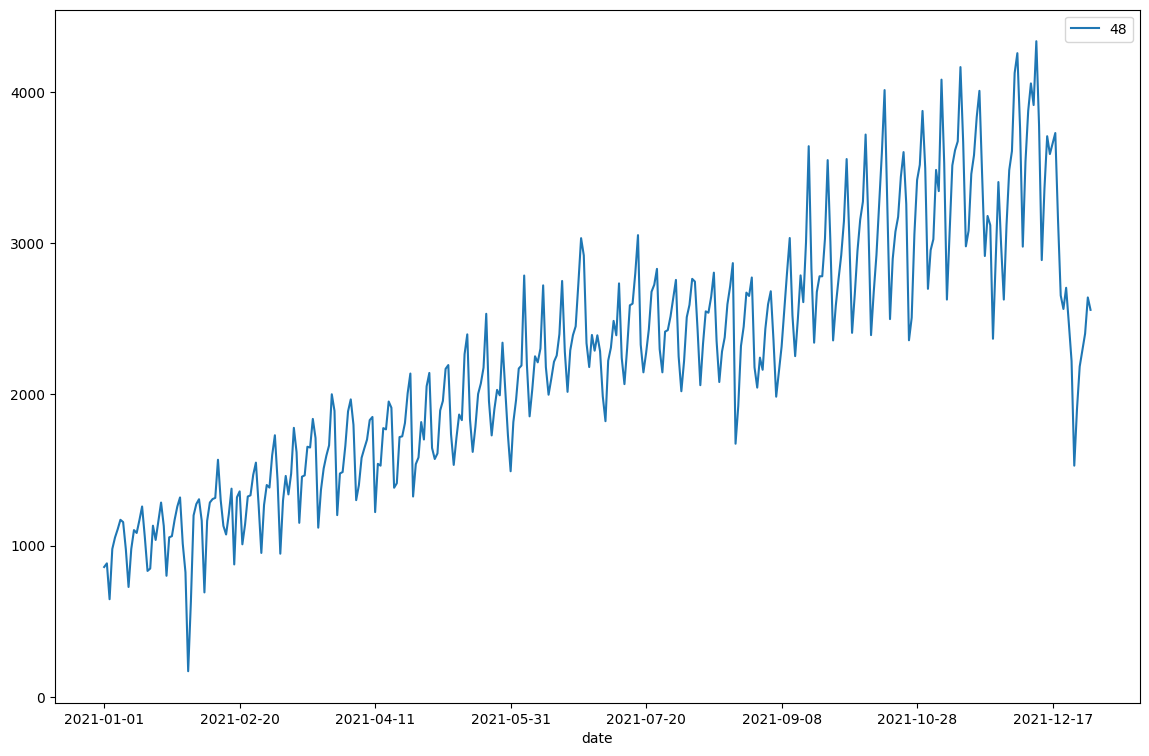

In [ ]:
plot_df.plot(figsize=(14, 9))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(plot_df['48'])

1. ADF :  -1.6185728454804555
2. P-Value :  0.47347757938535645
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 350
5. Critical Values :
	 1% :  -3.4491725955218655
	 5% :  -2.8698334971428574
	 10% :  -2.5711883591836733


In [ ]:
plot_df['Seasonal First Difference']=plot_df['48']-plot_df['48'].shift(1) #shift by 30 days / a month

In [ ]:
## Again test dickey fuller test
ad_test(plot_df['Seasonal First Difference'].dropna())

1. ADF :  -5.8081938652637755
2. P-Value :  4.4650299352707264e-07
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 350
5. Critical Values :
	 1% :  -3.4491725955218655
	 5% :  -2.8698334971428574
	 10% :  -2.5711883591836733


This is a pretty good p - value
Let's plot the seasonal first difference and check

<Axes: xlabel='date'>

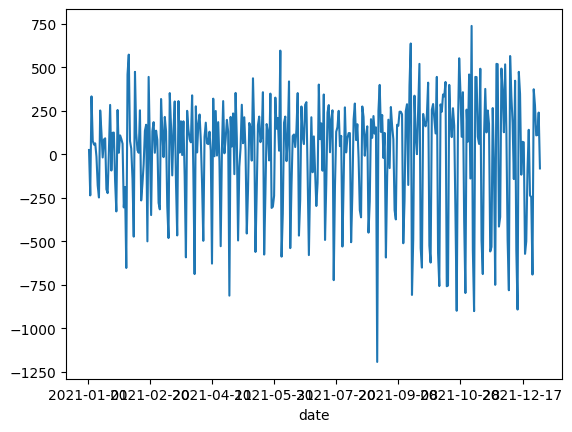

In [ ]:
plot_df['Seasonal First Difference'].plot()

In [ ]:
#from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


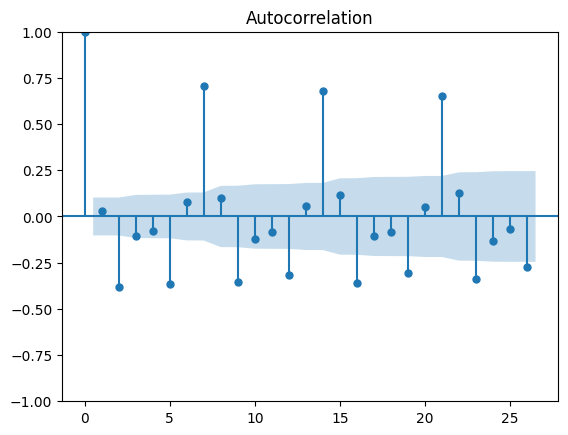

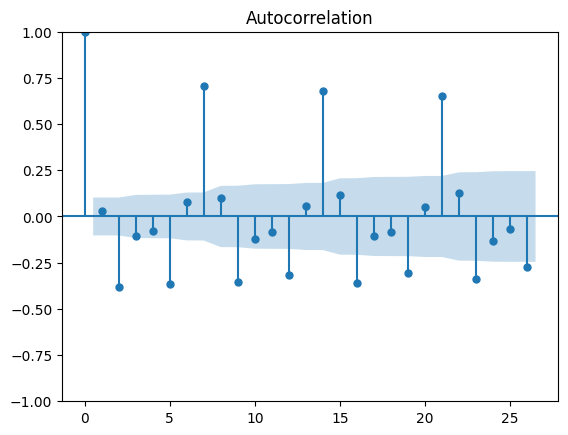

In [ ]:
plot_acf(plot_df['Seasonal First Difference'].dropna())

In [ ]:
#lags of 2, 5, 7 are highly correlated

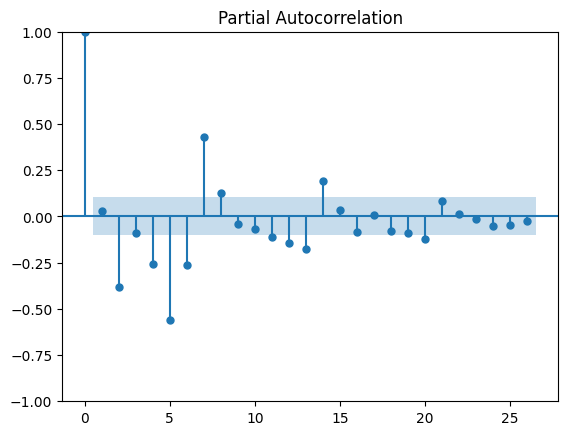

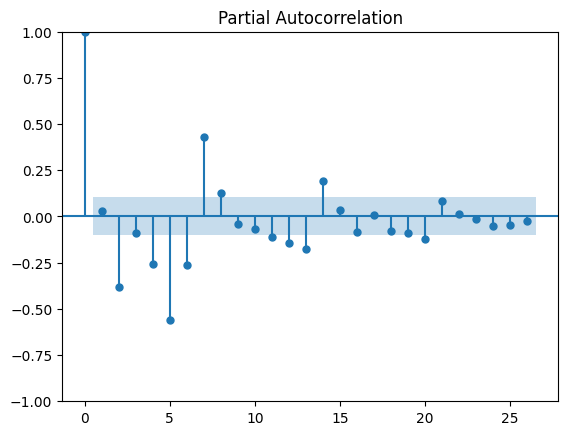

In [ ]:
plot_pacf(plot_df['Seasonal First Difference'].dropna()) #lags of 2, 5, 6, 7 are  highly correlated

In [ ]:
y = b + a, * x1 + a2 * x2 .... + b1 * z1 + b2 * z2 + .....

In [ ]:
plot_df.head()

,48,Seasonal First Difference
date,,
2021-01-01,859,NaN
2021-01-02,883,24.0
2021-01-03,646,-237.0
2021-01-04,978,332.0
2021-01-05,1054,76.0


In [ ]:
print(plot_df.index)

Index(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
       '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10',
       ...
       '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
       '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'],
      dtype='object', name='date', length=365)


In [ ]:
from datetime import datetime
import pandas as pd

def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [4]:
from datetime import datetime
from datetime import timedelta

train_end = datetime(2021, 5, 30)
test_start = datetime(2021,5,30)
test_end = datetime(2021, 6, 2)

train_data = plot_df[:str(train_end)]
#test_data = plot_df[str(train_end.strftime('%Y-%m-%d')) + str(timedelta(days=1)):str(test_end.strftime('%Y-%m-%d'))]
test_data = plot_df[str(test_start) : str(test_end)]
print(train_data)
print(test_data)

              48
date            
2021-01-01   859
2021-01-02   883
2021-01-03   646
2021-01-04   978
2021-01-05  1054
...          ...
2021-05-26  2030
2021-05-27  1994
2021-05-28  2342
2021-05-29  2033
2021-05-30  1731

[150 rows x 1 columns]
              48
date            
2021-05-31  1492
2021-06-01  1817
2021-06-02  1963


In [5]:
# Select the first column of the train_data dataframe as the endog variable
endog = train_data.iloc[:, 0]

In [6]:
print(train_data['48'])

date
2021-01-01     859
2021-01-02     883
2021-01-03     646
2021-01-04     978
2021-01-05    1054
              ... 
2021-05-26    2030
2021-05-27    1994
2021-05-28    2342
2021-05-29    2033
2021-05-30    1731
Name: 48, Length: 150, dtype: int64


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(train_data['48'], order=(5, 1, 5))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
mle_retvals = results.mle_retvals
print(mle_retvals)

{'fopt': 6.44352943062798, 'gopt': array([ 0.01617341,  0.0092319 ,  0.02677228, -0.00260149, -0.00627896,
       -0.00105905, -0.00324989, -0.00270249,  0.0030092 , -0.00478378,
        0.00161972]), 'fcalls': 708, 'warnflag': 1, 'converged': False, 'iterations': 50}


In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                     48   No. Observations:                  150
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -966.529
Date:                Mon, 27 May 2024   AIC                           1955.059
Time:                        14:04:00   BIC                           1988.102
Sample:                    01-01-2021   HQIC                          1968.484
                         - 05-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8185      0.234      3.500      0.000       0.360       1.277
ar.L2         -1.4429      0.200     -7.203      0.000      -1.835      -1.050
ar.L3          0.8198      0.327      2.504      0.0

In [23]:
#using SARIMAX because only through this we can change the number of iteration of maximum likelihood estimation

from statsmodels.tsa.statespace.sarimax import SARIMAX


model2 = SARIMAX(train_data['48'], order=(5, 1, 5) )
results2 = model2.fit(maxiter=1000)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     48   No. Observations:                  150
Model:               SARIMAX(5, 1, 5)   Log Likelihood                -961.208
Date:                Tue, 28 May 2024   AIC                           1944.417
Time:                        11:11:55   BIC                           1977.460
Sample:                    01-01-2021   HQIC                          1957.842
                         - 05-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9463      0.040     23.759      0.000       0.868       1.024
ar.L2         -1.5546      0.043    -36.156      0.000      -1.639      -1.470
ar.L3          1.0000      0.055     18.135      0.000       0.892       1.108
ar.L4         -1.0974      0.027    -40.583      0.000      -1.150      -1.044
ar.L5          0.1175      0.031      3.741      0.000       0.056       0.179
ma.L1         -1.6003      1.797     -0.890      0.373      -5.123       1.922
ma.L2          2.0937      1.406      1.489      0.136      -0.662       4.849
ma.L3         -1.9524      1.805     -1.082      0.279      -5.489       1.584
ma.L4          1.6392      1.406      1.166      0.244      -1.116       4.395
ma.L5         -0.7746      0.072    -10.815      0.000      -0.915      -0.634
sigma2      2.143e+04      0.000   9.02e+07      0.000    2.14e+04    2.14e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):               273.14
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -1.43
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.4e+25. Standard errors may be unstable.
"""

In [56]:
#get prediction start and end dates
pred_start_date = train_data.index[0]
pred_end_date = '2021-07-02'
#get the predictions and residuals
predictions_sarimax = results2.predict(start=pred_start_date, end=pred_end_date)

In [54]:
filtered_sarima = plot_df.loc[:'2021-07-02']

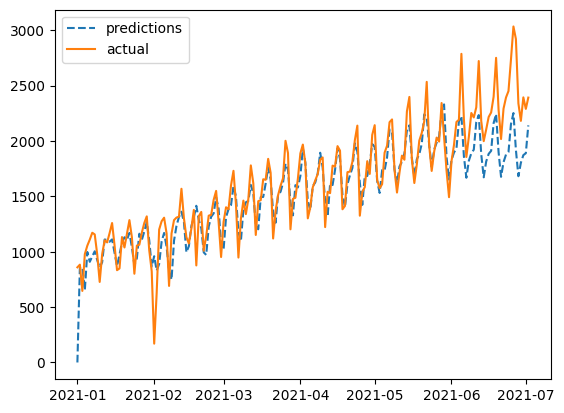

In [57]:
plt.plot(predictions_sarimax, label='predictions', linestyle='--')
plt.plot(filtered_sarima['48'], label='actual')
plt.legend()
plt.show()

In [58]:


#get prediction start and end dates
pred_start_date = '2021-05-31'
pred_end_date = '2021-06-02'
#get the predictions and residuals
predictions_sarimax = results2.predict(start=pred_start_date, end=pred_end_date)

In [59]:
print(predictions_sarimax)

2021-05-31    1651.373743
2021-06-01    1826.110634
2021-06-02    1894.822109
Freq: D, Name: predicted_mean, dtype: float64


**Reducing window size**

In [62]:
train_st = datetime(2021, 4, 1)
train_end = datetime(2021, 5, 30)
train_reduced = plot_df[str(train_st):str(train_end)]

#print(train_reduced)

In [63]:
# Define and fit the ARIMA model
model = ARIMA(train_reduced['48'], order=(5, 1, 5))
results_reduced = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:

#get prediction start and end dates
pred_start_date = '2021-05-31'
pred_end_date = '2021-06-02'
#get the predictions and residuals
predictions_reduced = results_reduced.predict(start=pred_start_date, end=pred_end_date)

In [72]:
print(predictions_reduced)

2021-05-31    1509.044601
2021-06-01    1671.869795
2021-06-02    1776.794641
Freq: D, Name: predicted_mean, dtype: float64


In [73]:
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(test_data['48'], predictions_reduced))

# Print the root mean squared error
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 136.6573949505422


In [68]:
#get prediction start and end dates
pred_start_date = train_reduced.index[0]
pred_end_date = '2021-06-15'
#get the predictions and residuals
predictions_reduced = results_reduced.predict(start=pred_start_date, end=pred_end_date)

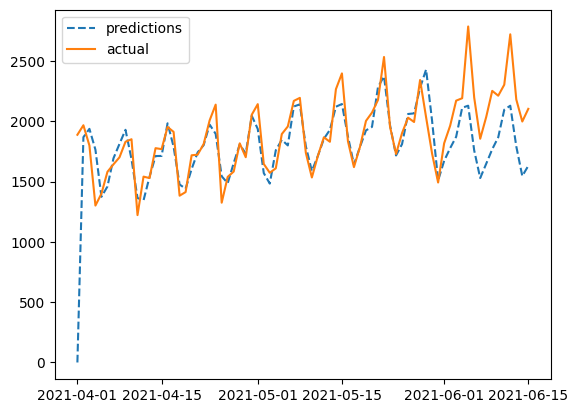

In [69]:
filtered_reduced = plot_df.loc['2021-04-01':'2021-06-15']

plt.plot(predictions_reduced, label='predictions', linestyle='--')
plt.plot(filtered_reduced['48'], label='actual')
plt.legend()
plt.show()

# Predictig for 3 days

In [ ]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
#get the predictions and residuals
predictions = results.predict(start=pred_start_date, end=pred_end_date)

In [ ]:
print(predictions)

2021-05-31    1621.965981
2021-06-01    1817.075273
2021-06-02    1910.836396
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(test_data['48'], predictions))

# Print the root mean squared error
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 80.85419669834945


In [ ]:
plot_df.index = pd.to_datetime(plot_df.index)

In [ ]:
start_date = '2021-05-25'
end_date = '2021-06-02'

# Filter the DataFrame for the date range
filtered_df = plot_df.loc[start_date:end_date]

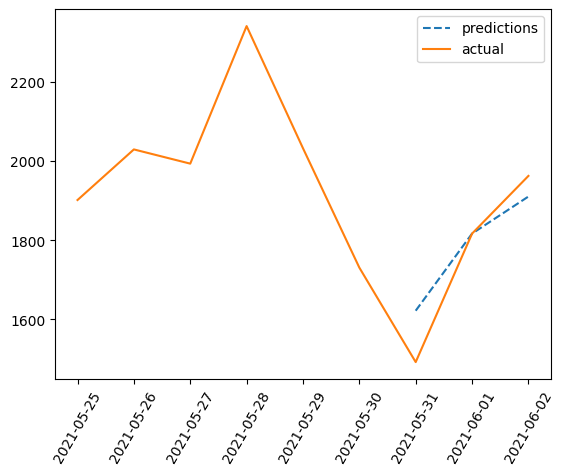

In [ ]:
plt.plot(predictions, label='predictions', linestyle='--')
plt.plot(filtered_df['48'], label='actual')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# Predicting for 6 days

In [ ]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = '2021-06-05'
#get the predictions and residuals
predictions = results.predict(start=pred_start_date, end=pred_end_date)

In [ ]:
print(predictions)

2021-05-31    1621.965981
2021-06-01    1817.075273
2021-06-02    1910.836396
2021-06-03    1935.007238
2021-06-04    2169.927325
2021-06-05    2213.231101
Freq: D, Name: predicted_mean, dtype: float64


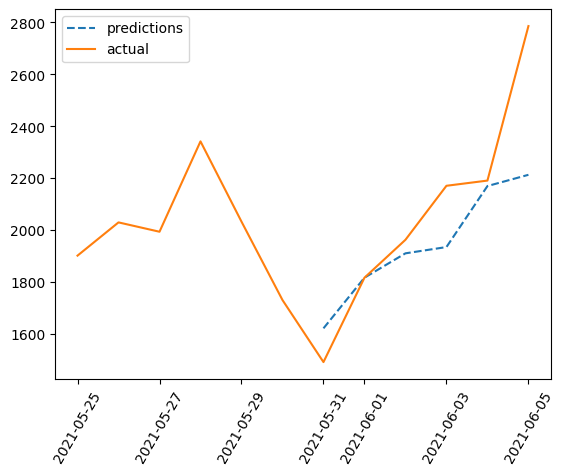

In [ ]:
start_date = '2021-05-25'
end_date = '2021-06-05'

# Filter the DataFrame for the date range
filtered_df = plot_df.loc[start_date:end_date]

plt.plot(predictions, label='predictions', linestyle='--')
plt.plot(filtered_df['48'], label='actual')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# Predicting for 8 days

In [ ]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = '2021-06-08'
#get the predictions and residuals
predictions = results.predict(start=pred_start_date, end=pred_end_date)

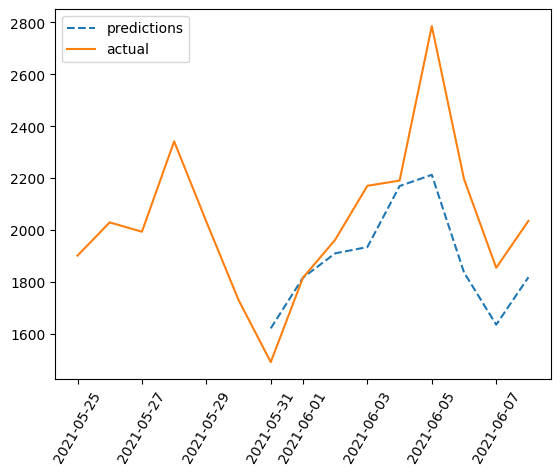

In [ ]:
start_date = '2021-05-25'
end_date = '2021-06-08'

# Filter the DataFrame for the date range
filtered_df = plot_df.loc[start_date:end_date]

plt.plot(predictions, label='predictions', linestyle='--')
plt.plot(filtered_df['48'], label='actual')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# Sliding Window

In [ ]:
train_start = datetime(2021, 1, 3)
train_end = datetime(2021, 6, 2)
test_start = datetime(2021,6,3)
test_end = datetime(2021, 6, 5)

train_data = plot_df[str(train_start):str(train_end)] ####slided three steps forward
#test_data = plot_df[str(train_end.strftime('%Y-%m-%d')) + str(timedelta(days=1)):str(test_end.strftime('%Y-%m-%d'))]
test_data = plot_df[str(test_start) : str(test_end)]
print(train_data)
print(test_data)

              48  Seasonal First Difference
date                                       
2021-01-03   646                     -237.0
2021-01-04   978                      332.0
2021-01-05  1054                       76.0
2021-01-06  1109                       55.0
2021-01-07  1171                       62.0
...          ...                        ...
2021-05-29  2033                     -309.0
2021-05-30  1731                     -302.0
2021-05-31  1492                     -239.0
2021-06-01  1817                      325.0
2021-06-02  1963                      146.0

[151 rows x 2 columns]
              48  Seasonal First Difference
date                                       
2021-06-03  2171                      208.0
2021-06-04  2191                       20.0
2021-06-05  2786                      595.0


In [ ]:
# Select the first column of the train_data dataframe as the endog variable
endog = train_data.iloc[:, 0]

In [ ]:
# Define and fit the ARIMA model
model = ARIMA(train_data['48'], order=(5, 1, 5))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
#get the predictions and residuals
predictions = results.predict(start=pred_start_date, end=pred_end_date)

In [ ]:
print(predictions)

2021-06-03    1961.804221
2021-06-04    2177.756921
2021-06-05    2209.708795
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
start_date = '2021-05-25'
end_date = '2021-06-05'

# Filter the DataFrame for the date range
filtered_df = plot_df.loc[start_date:end_date]

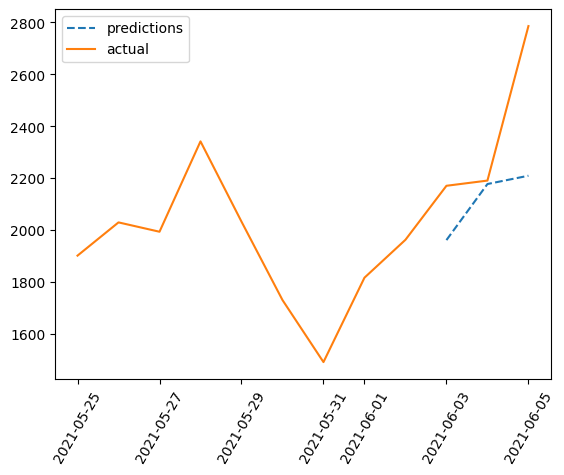

In [ ]:
plt.plot(predictions, label='predictions', linestyle='--')
plt.plot(filtered_df['48'], label='actual')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# GLOBAL PLOT

In [50]:
#get prediction start and end dates
pred_start_date = train_data.index[0]
pred_end_date = test_data.index[-1]
#get the predictions and residuals
predictions = results.predict(start=pred_start_date, end=pred_end_date)

In [51]:
print(predictions)

2021-01-01       0.000000
2021-01-02     847.733997
2021-01-03     859.800592
2021-01-04     689.498822
2021-01-05     949.965224
                 ...     
2021-05-29    2395.509785
2021-05-30    1873.151880
2021-05-31    1621.965981
2021-06-01    1817.075273
2021-06-02    1910.836396
Freq: D, Name: predicted_mean, Length: 153, dtype: float64


In [ ]:
plot_df.index

Index(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
       '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10',
       ...
       '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
       '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30'],
      dtype='object', name='date', length=181)

In [ ]:
predictions.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-29', '2021-05-30', '2021-05-31',
               '2021-06-01', '2021-06-02'],
              dtype='datetime64[ns]', length=153, freq='D')

In [ ]:
print(predictions)

2021-01-01       0.000000
2021-01-02     846.272608
2021-01-03     856.989619
2021-01-04     683.535212
2021-01-05     950.139377
                 ...     
2021-05-29    2382.336073
2021-05-30    1865.126111
2021-05-31    1611.113585
2021-06-01    1798.618711
2021-06-02    1885.599098
Freq: D, Name: predicted_mean, Length: 153, dtype: float64


In [ ]:
plot_df.head()

,48,Seasonal First Difference
date,,
2021-01-01,859,NaN
2021-01-02,883,24.0
2021-01-03,646,-237.0
2021-01-04,978,332.0
2021-01-05,1054,76.0


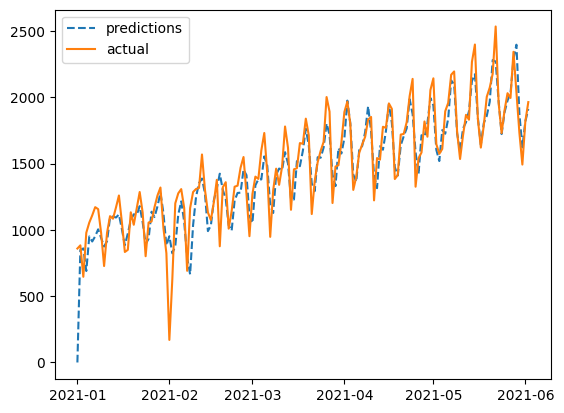

In [53]:
plt.plot(predictions, label='predictions', linestyle='--')
plt.plot(plot_df['48'][:'2021-06-02'], label='actual')
plt.legend()
plt.show()

# Region 68


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(plot_df['50'].dropna(), trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2149.758, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2143.268, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2147.867, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2128.052, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2124.341, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2119.642, Time=0.23 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2094.749, Time=0.66 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2066.412, Time=1.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2040.293, Time=1.84 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=2041.365, Time=1.27 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0

In [ ]:
import statsmodels.api as sm

In [ ]:
#model=sm.tsa.statespace.SARIMAX(plot_df['50'],order=(5, 1, 2),seasonal_order=(5,1,2,15)) # look into these parameters very carefully before training
model=sm.tsa.statespace.SARIMAX(plot_df['50'],order=(5, 1, 2),seasonal_order=(5,1,2,15))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

<Axes: xlabel='date'>

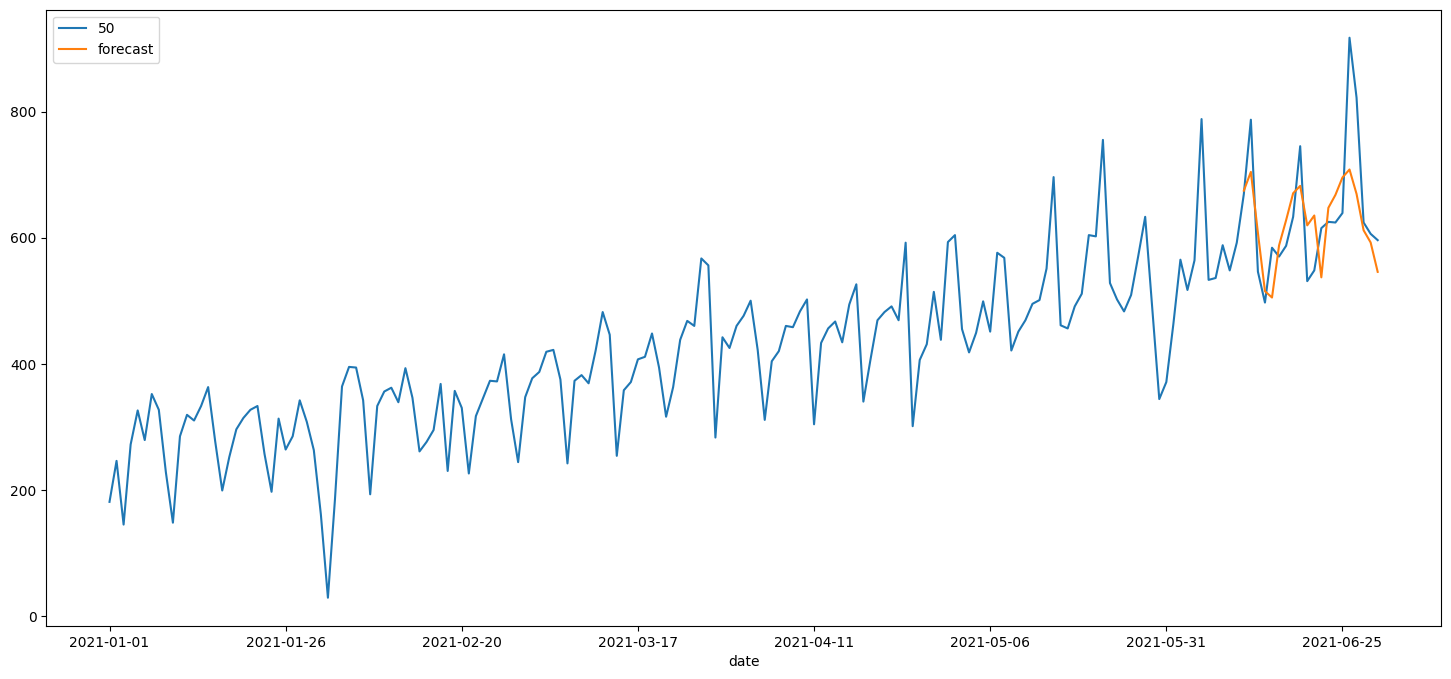

In [ ]:
plot_df['forecast']=results.predict(start=len(plot_df)-25,end=len(plot_df)-1,dynamic=True)
plot_df[['50','forecast']].plot(figsize=(18,8))

# Using fast fourier transform

In [ ]:
!pip install fft

  Preparing metadata (setup.py) ... done
  Created wheel for fft: filename=fft-0.1-py3-none-any.whl size=1131 sha256=015ca5c056724e27096d0ec5602d394aac10a4512a2bb64e3f1593f86d5daeb0
  Stored in directory: /root/.cache/pip/wheels/f2/70/4f/91ec7b0bea7d1150b77242a9f4ec63ea551ab464a8561f9fb5
Successfully built fft


In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('2021_merged.csv')

# Extract the fiftieth column (excluding the first row)
x = df.iloc[:, 49].values

In [ ]:
print(x)

[ 929  948  694 1054 1144 1203 1290 1242 1049  785 1069 1195 1170 1281
 1365 1122  884  920 1242 1111 1272 1392 1212  872 1159 1160 1282 1350
 1426 1099  910  205  693 1314 1393 1431 1254  740 1268 1370 1424 1448
 1718 1412 1232 1169 1304 1498  976 1420 1479 1101 1245 1459 1471 1599
 1679 1368 1054 1384 1515 1501 1735 1890 1529 1034 1417 1560 1450 1606
 1923 1738 1235 1574 1580 1803 1798 1998 1861 1210 1459 1633 1723 1803
 2172 2046 1325 1599 1609 1809 2033 2112 1940 1400 1530 1711 1775 1847
 1966 2023 1326 1688 1656 1911 1928 2105 2045 1494 1523 1826 1873 1943
 2167 2278 1434 1670 1692 1944 1829 2227 2303 1782 1711 1717 2027 2111
 2338 2345 1902 1666 1829 1994 1984 2449 2584 1988 1733 1901 2118 2223
 2357 2693 2088 1873 2040 2153 2132 2526 2190 1863 1648 1934 2096 2308
 2364 2975 2374 2019 2184 2425 2385 2470 2939 2354 2142 2262 2393 2408
 2543 2978 2495 2175 2457 2543 2635 2940 3303 3176 2506 2357 2585]


In [ ]:
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import sys

In [ ]:
def fourierExtrapolation(x, n_predict, harmonics, poly_degree = 100):
    n = x.size
    n_harm = harmonics  # Set the number of harmonics manually

    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))

    # sort indexes by frequency, lower -> higher
    indexes.sort(key=lambda i: np.absolute(f[i]))
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)

    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)


    restored_sig += p[0] * t

    #Fit polynomial to the restored signal
    polynomial_coeff = np.polyfit(t, restored_sig, poly_degree)
    polynomial_fit = np.polyval(polynomial_coeff, t)

    return restored_sig, polynomial_coeff, polynomial_fit

In [ ]:
def print_polynomial(coeffs):
    terms = []
    degree = len(coeffs) - 1
    for i, coeff in enumerate(coeffs):
        power = degree - i
        if power == 0:
            terms.append(f"{coeff:.4g}")
        elif power == 1:
            terms.append(f"{coeff:.4g}x")
        else:
            terms.append(f"{coeff:.4g}x^{power}")
    polynomial_str = " + ".join(terms)
    return polynomial_str

/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
<ipython-input-28-cacc8bab1a4d>:26: RankWarning: Polyfit may be poorly conditioned
  polynomial_coeff = np.polyfit(t, restored_sig, poly_degree)


Fitted Polynomial Function:
-0x^100 + 0x^99 + -0x^98 + -0x^97 + 0x^96 + -0x^95 + 0x^94 + 0x^93 + 0x^92 + -0x^91 + -0x^90 + -0x^89 + 0x^88 + -0x^87 + -0x^86 + -0x^85 + 0x^84 + 0x^83 + -0x^82 + -0x^81 + -1.976e-140x^80 + 2.398e-138x^79 + 1.233e-136x^78 + -3.207e-135x^77 + -9.73e-133x^76 + -8.494e-131x^75 + -3.915e-129x^74 + 5.296e-128x^73 + 3.18e-125x^72 + 3.833e-123x^71 + 3.055e-121x^70 + 1.624e-119x^69 + 2.012e-118x^68 + -8.163e-116x^67 + -1.296e-113x^66 + -1.292e-111x^65 + -9.665e-110x^64 + -5.057e-108x^63 + -6.525e-107x^62 + 2.576e-104x^61 + 4.222e-102x^60 + 4.396e-100x^59 + 3.504e-98x^58 + 2.071e-96x^57 + 5.804e-95x^56 + -6.038e-93x^55 + -1.306e-90x^54 + -1.5e-88x^53 + -1.287e-86x^52 + -8.321e-85x^51 + -3.088e-83x^50 + 1.4e-81x^49 + 4.273e-79x^48 + 5.261e-77x^47 + 4.637e-75x^46 + 2.993e-73x^45 + 1.016e-71x^44 + -6.83e-70x^43 + -1.719e-67x^42 + -1.978e-65x^41 + -1.589e-63x^40 + -8.263e-62x^39 + -1.684e-61x^38 + 5.76e-58x^37 + 8.149e-56x^36 + 7.072e-54x^35 + 3.733e-52x^34 + -9.931e-52

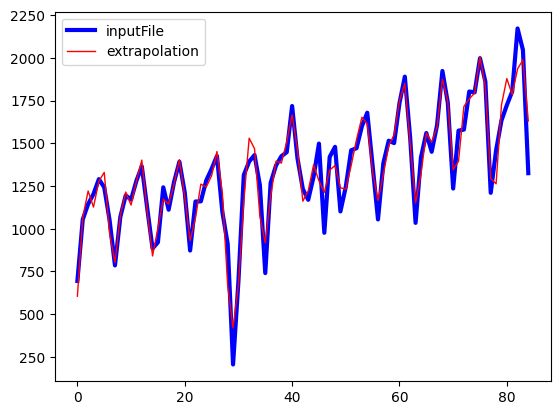

In [ ]:
df = pd.read_csv('2021_merged.csv')
y = df.iloc[2:87, 49].values
x = df.iloc[2:80, 49].values  # Extract the second column (excluding the first row)

n_predict = 7  # Set the number of predictions manually

extrapolation, polynomial_coeff, polynomial_fit = fourierExtrapolation(x, n_predict, 22)

# Print the polynomial function
polynomial_function_str = print_polynomial(polynomial_coeff)
print("Fitted Polynomial Function:")
print(polynomial_function_str)

pl.plot(np.arange(0, y.size), y, 'b', label='inputFile', linewidth=3)
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label='extrapolation', linewidth=1)
pl.legend()
pl.show()

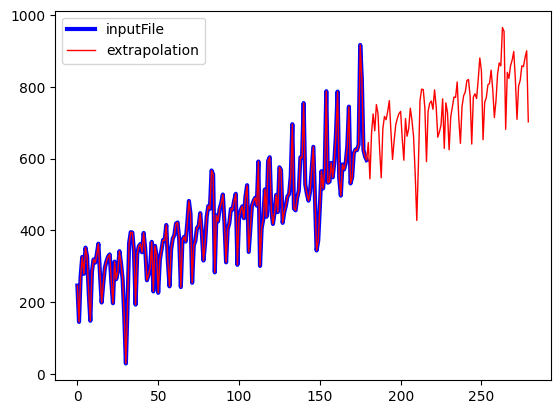

In [ ]:
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import sys

def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 100  # Set the number of harmonics manually
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key=lambda i: np.absolute(f[i]))
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

def main():
    df = pd.read_csv('2021_merged.csv')
    x = df.iloc[1:, 51].values  # Extract the second column (excluding the first row)
    n_predict = 100  # Set the number of predictions manually
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, x.size), x, 'b', label='inputFile', linewidth=3)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label='extrapolation', linewidth=1)
    pl.legend()
    pl.show()

if __name__ == "__main__":
    main()
